In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [192]:
df = pd.read_csv('Algerian_forest_fire_cleaned_dataset.csv')
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [193]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [194]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [195]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [196]:
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [197]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [198]:
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [199]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [200]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [201]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [202]:
## Dependent and Indepedent Features
X = df.drop('FWI',axis=1)
Y = df['FWI']

In [203]:
X.head()
X.shape

(243, 11)

In [204]:
Y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [214]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42,test_size=0.20)

In [215]:
## Feature selection based on correlation.
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


<Axes: >

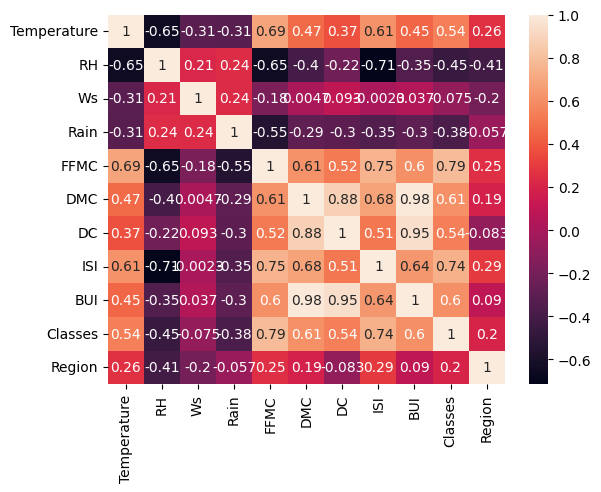

In [207]:
sns.heatmap(X_train.corr(),annot=True)

In [208]:
## Drop the columns that are above threshold 
## case of multicollinearity 
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
## Threshold -- Domain Expertise
corr_features = correlation(X_train,0.85)
print(corr_features)

{'DC', 'BUI'}


115     0.7
207    30.3
158     5.2
132    16.7
84     20.9
Name: FWI, dtype: float64

In [216]:

X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)


In [217]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
115,29,65,19,0.6,68.3,5.5,1.5,0,0
207,33,37,16,0.0,92.2,61.3,13.1,1,1
158,38,43,13,0.5,85.0,13.0,4.1,1,1
132,31,42,21,0.0,90.6,18.2,13.4,1,1
84,34,64,14,0.0,88.9,40.5,9.0,1,0


In [218]:
X_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1


In [219]:
from sklearn.preprocessing import StandardScaler
X_train.shape, X_test.shape
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [220]:
X_train_scaled

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
        -1.14434427, -1.01036297]], shape=(194, 9))

In [221]:
X_test_scaled

array([[-0.32677059,  0.14650162, -0.2352019 , -0.38015572,  0.61070375,
        -0.07699537,  0.17532762,  0.8738629 , -1.01036297],
       [ 0.22209084, -0.52066537, -0.99568804, -0.38015572,  0.71720269,
        -0.40637763,  0.33729694,  0.8738629 , -1.01036297],
       [-1.15006273, -0.25379858,  0.90552731,  0.6761624 , -1.02228009,
        -0.91960114, -0.86590375, -1.14434427,  0.98974332],
       [ 0.49652155, -0.25379858, -0.99568804, -0.2841268 ,  0.09950881,
         0.26770699, -0.65765748, -1.14434427,  0.98974332],
       [-0.60120131,  0.21321832, -0.61544497, -0.38015572,  0.51840466,
         0.06088557, -0.10233408,  0.8738629 ,  0.98974332],
       [ 1.86867512,  0.14650162, -2.51666033,  0.1960178 , -0.30518719,
        -0.26849668, -0.88904223, -1.14434427,  0.98974332],
       [-1.15006273,  0.8803853 ,  0.14504117, -0.38015572,  0.29120691,
        -0.82768051, -0.37999578,  0.8738629 ,  0.98974332],
       [ 1.31981369, -1.72156595, -0.99568804, -0.09206896,  0

Text(0.5, 1.0, 'X_Train After Scaling')

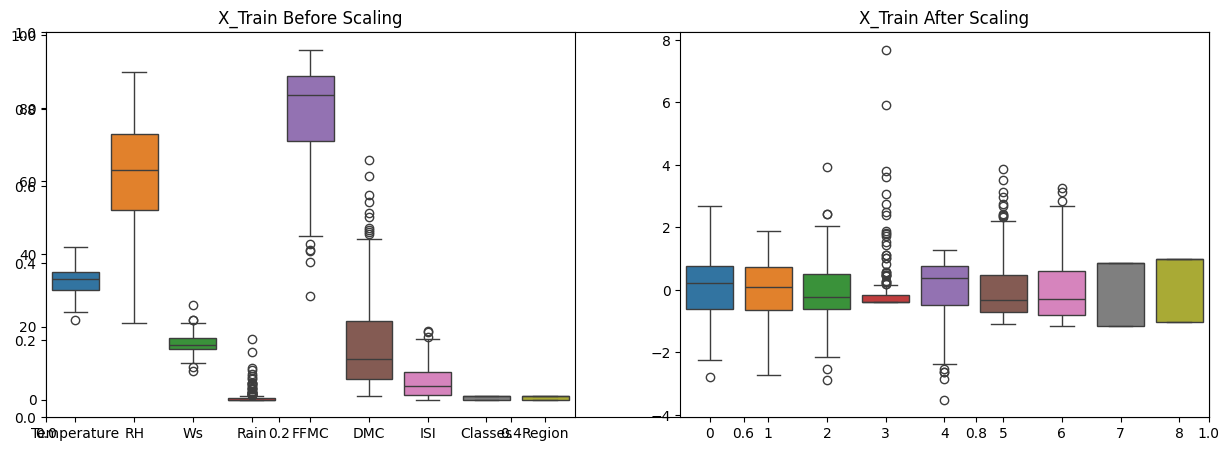

In [222]:
## Box Plots to understand effects of Standard Scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title('X_Train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title('X_Train After Scaling')

In [223]:
## Linear Regression Mode
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,Y_train)
Y_pred = lin_reg.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
rmse = root_mean_squared_error(Y_test,Y_pred)
score = r2_score(Y_test, Y_pred)

In [224]:
print('MSE : ',mse)
print('RMSE : ',rmse)
print('mae : ',mae)
print('R2 Score : ',score)

MSE :  0.5882990110708681
RMSE :  0.7670065260940536
mae :  0.5049978694165681
R2 Score :  0.9805895859259882


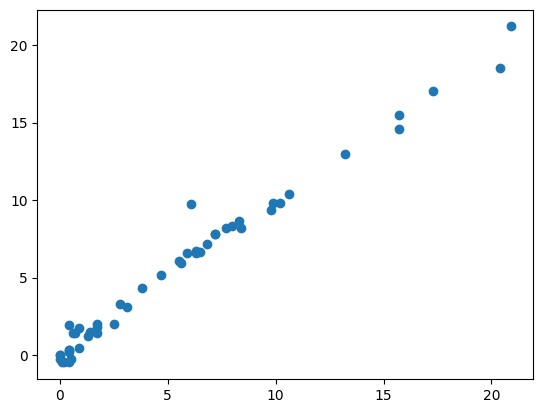

In [225]:
plt.scatter(Y_test,Y_pred)

MAE :  1.0093958923873403
Score : 0.9430507350726564


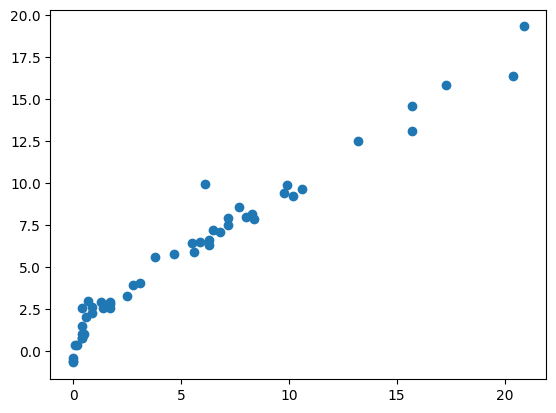

In [227]:
## lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,Y_train)
Y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Y_pred)
score = r2_score(Y_test, Y_pred)
print('MAE : ', mae)
print('Score :', score)
plt.scatter(Y_test,Y_pred)

MAE :  0.555671503161787
Score : 0.978328234520343


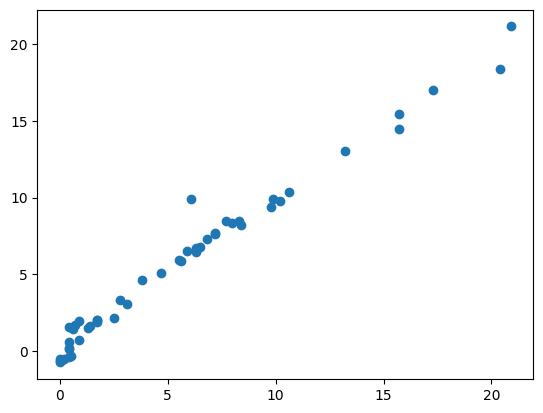

In [228]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, r2_score
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,Y_train)
Y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Y_pred)
score = r2_score(Y_test, Y_pred)
print('MAE : ', mae)
print('Score :', score)
plt.scatter(Y_test,Y_pred)

MAE :  0.5192048325844753
Score : 0.9801058063273601


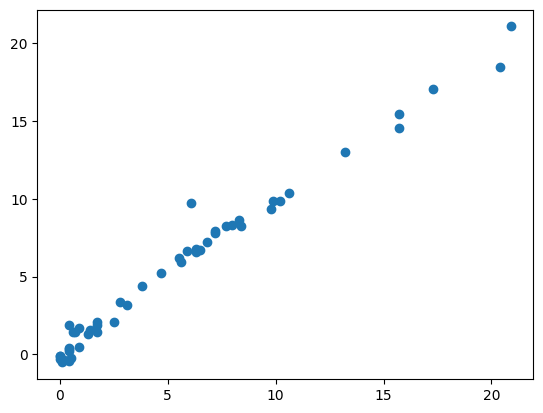

In [ ]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,Y_train)
Y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Y_pred)
score = r2_score(Y_test, Y_pred)
print('MAE : ', mae)
print('Score :', score)
plt.scatter(Y_test,Y_pred)

MAE :  0.6869262008277133
Score : 0.9722193780965626


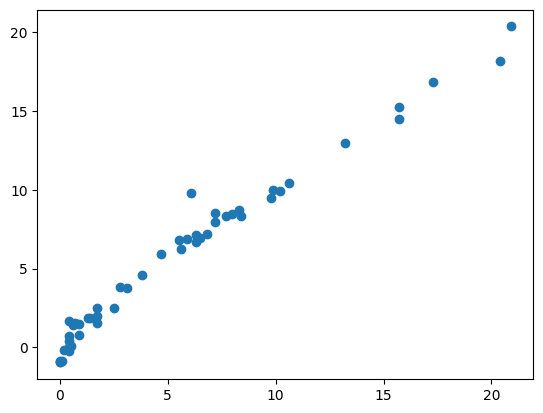

In [230]:
## Ridge Regression Cross Validation
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,Y_train)
Y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Y_pred)
score = r2_score(Y_test, Y_pred)
print('MAE : ', mae)
print('Score :', score)
plt.scatter(Y_test,Y_pred)

MAE :  1.683441634013671
Score : 0.8676961352267807


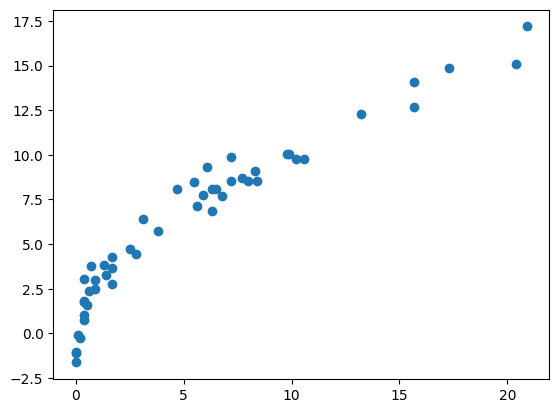

In [231]:
## ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled,Y_train)
Y_pred = elasticnet.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Y_pred)
score = r2_score(Y_test, Y_pred)
print('MAE : ', mae)
print('Score :', score)
plt.scatter(Y_test,Y_pred)

MAE :  0.5710147088777219
Score : 0.9781014571778188


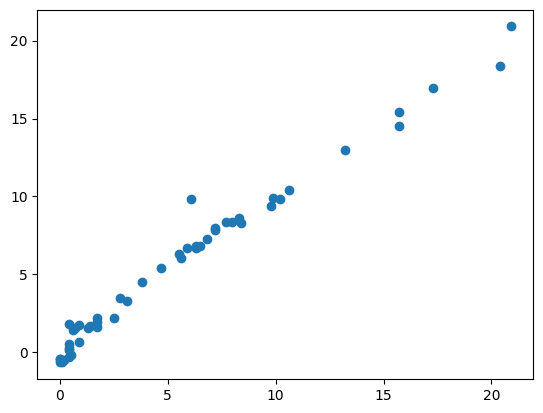

In [232]:
## ElasticNet Cv regression
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, r2_score
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled,Y_train)
Y_pred = elasticnetcv.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Y_pred)
score = r2_score(Y_test, Y_pred)
print('MAE : ', mae)
print('Score :', score)
plt.scatter(Y_test,Y_pred)

## Pickle the machine learning models, preprocessing model standardscaler

In [233]:
scaler

StandardScaler()

In [234]:
ridge

Ridge()

In [235]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))